## Cheteau de Montana: Aplicación del Análisis de datos a simular el precio de la habitación de un hotel reposicionado

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm


In [2]:
# Lectura de datos
df = pd.read_csv('Data.csv', sep=';')
print(df.shape)
df.head()

(388, 28)


,Hotel ID,BAR,LOG BAR,High season,Zermatt,Verbier,Saas Fee,Satellite resorts,Booking.com stars,Booking.com guests rating,KM Distance ski lifts,KM Distance train station,Minibar,No. of floors,City center location,Room size,Recently renovated,Modern / Scandinavian,Traditional / Chalet,Signature restaurant,Free Wi-Fi,Breakfast included in base rent,Gym / fitness room,Pool,Wet zone,Body treatments,Outdoor jacuzzi/ pool,Extra wellness activities
0,1,207,2.315970,1,1,0,0,0,3,8.8,0.55,0.75,1,5,0,16,1,1,0,0,0,1,1,0,1,0,0,0
1,2,190,2.278754,1,1,0,0,0,3,9.3,0.60,0.22,0,4,0,27,1,1,0,0,0,1,0,0,0,0,0,0
2,3,289,2.460898,1,1,0,0,0,4,9.3,0.60,0.75,1,4,0,25,1,0,1,1,0,1,1,1,1,1,1,0
3,4,221,2.344392,1,1,0,0,0,3,8.8,0.70,0.26,1,4,0,20,1,0,0,1,0,1,0,0,1,1,0,0
4,5,236,2.372912,1,1,0,0,0,4,9.0,0.50,0.30,0,3,0,27,1,1,0,1,0,1,0,0,1,1,1,0


### EXPLORATORY DATA ANALYSIS

- Análisis en función al Precio (BAR)

In [3]:
# Variables numéricas continuas
l_var_continuas = ['Booking.com stars', 'Booking.com guests rating', 'KM Distance ski lifts', 'KM Distance train station',
                  'No. of floors', 'Room size']

# Variables dicotómicas
l_var_dicotomicas = ['Zermatt', 'Verbier', 'Saas Fee', 'Satellite resorts', 'Minibar', 'City center location',
'Recently renovated', 'Modern / Scandinavian ', 'Traditional / Chalet',
'Signature restaurant', 'Free Wi-Fi', 'Breakfast included in base rent',
'Gym / fitness room', 'Pool', 'Wet zone', 'Body treatments', 'Outdoor jacuzzi/ pool', 'Extra wellness activities']

**VARIABLES DICOTÓMICAS**

In [4]:
# Guardamos los promedios en diccionarios
dict_dico = {}

for column_name in l_var_dicotomicas:
  dict_dico[column_name] = df.groupby([column_name])["BAR"].mean().to_dict()

df_dico_mean = pd.DataFrame(dict_dico).transpose()
df_dico_mean
df_dico_mean.columns = ['Valor 0', 'Valor 1']
df_dico_mean['Diff'] = df_dico_mean['Valor 1'] - df_dico_mean['Valor 0']
df_dico_mean['% Var'] = round((df_dico_mean['Valor 1']/df_dico_mean['Valor 0'] - 1) * 100, 2)
df_dico_mean['Relación Positiva'] = np.where(df_dico_mean['Valor 0'] > df_dico_mean['Valor 1'], 0, 1)
# Mostramos los promedios
df_dico_mean

,Valor 0,Valor 1,Diff,% Var,Relación Positiva
Zermatt,207.042857,217.859551,10.816693,5.22,1
Verbier,212.722222,202.785714,-9.936508,-4.67,0
Saas Fee,218.734375,180.338235,-38.396140,-17.55,0
Satellite resorts,216.337423,189.225806,-27.111617,-12.53,0
Minibar,192.768456,275.700000,82.931544,43.02,1
City center location,206.351852,216.057522,9.705670,4.70,1
Recently renovated,162.734375,236.261538,73.527163,45.18,1
Modern / Scandinavian,204.500000,239.166667,34.666667,16.95,1
Traditional / Chalet,190.673759,268.754717,78.080958,40.95,1
Signature restaurant,178.125000,232.000000,53.875000,30.25,1


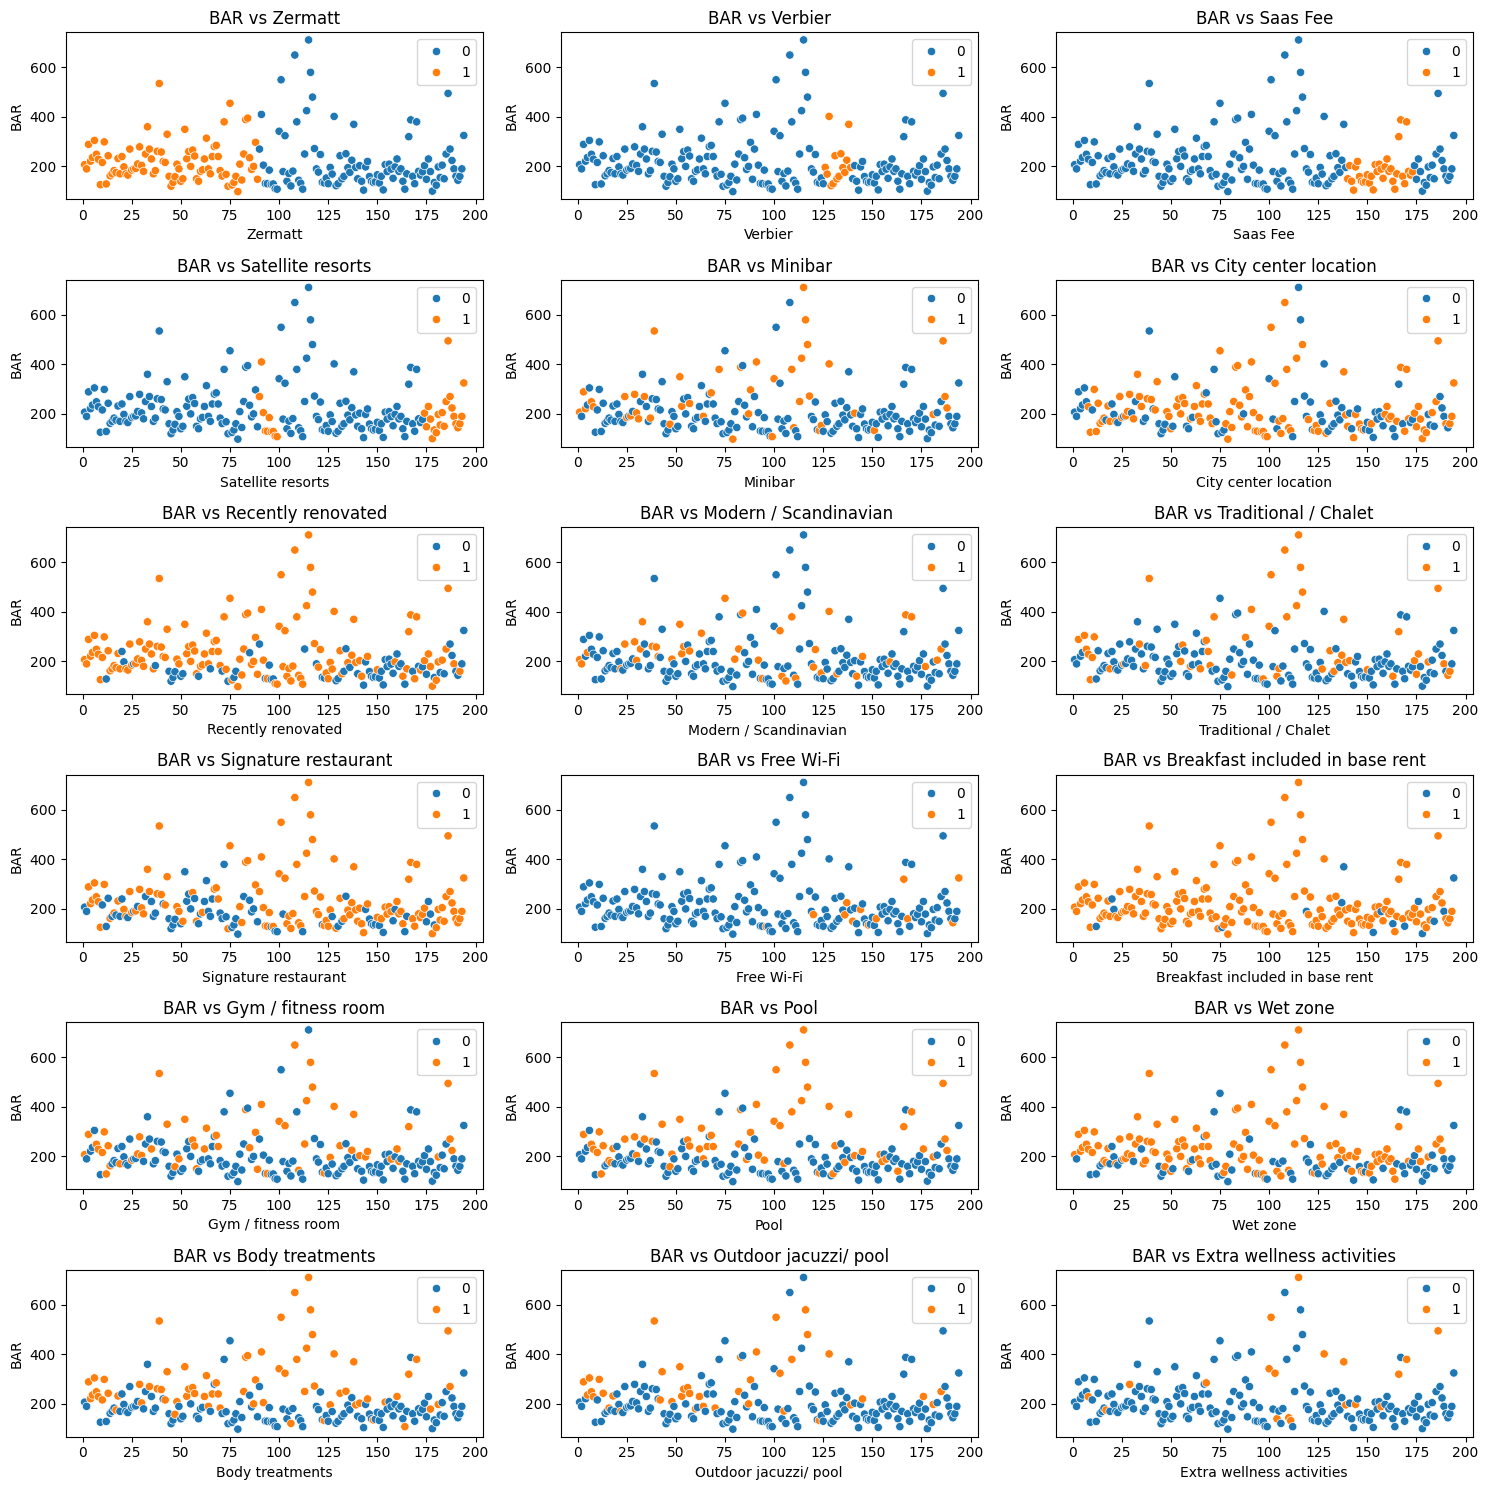

In [5]:
# Crear subplots para High season = 1
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 15))

# Graficar scatterplots para cada variable continua vs la variable dependiente
for i, var in enumerate(l_var_dicotomicas):
    row, col = divmod(i, 3)
    sns.scatterplot(x='Hotel ID', y='BAR', data=df[df['High season']==1], hue=var, ax=axes[row, col])
    axes[row, col].set_title(f"BAR vs {var}")
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel("BAR")
    axes[row, col].legend(loc='upper right')

plt.tight_layout()
plt.show()

- El promedio de precios de cuartes de hoteles con Free Wifi es menor que los que no ofrecen Free Wifi. Esto se debe a que tenemos una muestra muy pequeña de hoteles con Free Wifi, por lo que esta variable no será significativa.

- El promedio de precios de las ubicaciones Verbier, Saas Fee y Satellite resorts es mayor cuando no es en alguna de esas ubicaciones. Pero este análisis queda incompleto, se deben comparar precios entre ubicaciones. (Siguiente análisis)

- La arquitectura del hotel muestra que el precio por encima del promedio cuando es Modern / Scandinavian, pero cuando es Traditional / Chalet el precio es mayor.

- Los Precios son más altos cuando hay Pool, Body treatments, Gym / fitness room, Outdoor jacuzzi/ pool y Extra wellness activities.

- Si el hotel es recientemente renovadoo o si cuenta con Signature Restaurant el precio promedio aumenta.

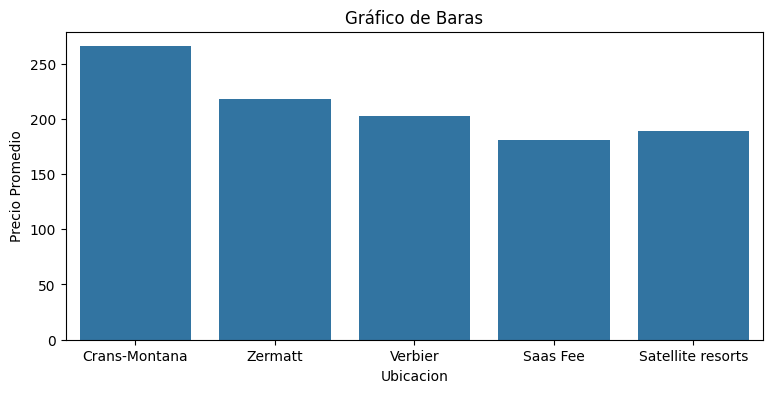

In [6]:
p_prom_Zermatt = df[df['Zermatt']==1]['BAR'].mean()
p_prom_Verbier = df[df['Verbier']==1]['BAR'].mean()
p_prom_SaasFee = df[df['Saas Fee']==1]['BAR'].mean()
p_prom_SatelliteResorts = df[df['Satellite resorts']==1]['BAR'].mean()
p_prom_CransMontana = df[(df['Zermatt']==0) & (df['Verbier']==0) & (df['Saas Fee']==0) & (df['Satellite resorts']==0)]['BAR'].mean()

dict_ubi = {'Ubicacion': ['Crans-Montana', 'Zermatt', 'Verbier', 'Saas Fee', 'Satellite resorts'],
                  'Precio Promedio': [p_prom_CransMontana, p_prom_Zermatt, p_prom_Verbier, p_prom_SaasFee, p_prom_SatelliteResorts]}

df_ubi = pd.DataFrame(dict_ubi)

colors = sns.color_palette('pastel')[0:5]

# Creamos gráfico de pie
plt.figure(figsize=(9, 4))
sns.barplot(x="Ubicacion", y="Precio Promedio", data=df_ubi)
plt.title('Gráfico de Baras')
plt.show()

- Hay un mayor precio promedio cuando los 4 campos de ubicación son 0.

**VARIABLES CONTINUAS**

In [7]:
# Variables continuas, valores
for var in l_var_continuas:
    valores = df[var].sort_values().drop_duplicates().tolist()
    print(f'{var}:\n{valores}\n')

Booking.com stars:
[1, 2, 3, 4, 5]

Booking.com guests rating:
[6.7, 7.1, 7.5, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8]

KM Distance ski lifts:
[0.0, 0.03, 0.031, 0.039, 0.05, 0.06, 0.1, 0.12, 0.13, 0.15, 0.16, 0.18, 0.19, 0.2, 0.21, 0.22, 0.24, 0.25, 0.26, 0.28, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 1.0, 1.1, 1.2, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.8, 6.0, 6.8, 7.0]

KM Distance train station:
[0.05, 0.07, 0.09, 0.1, 0.17, 0.18, 0.19, 0.21, 0.22, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.3, 1.4, 1.7, 1.9, 2.7, 3.6, 4.8, 5.5, 6.8, 7.3, 7.4, 7.8, 7.9, 8.0, 8.1, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 9.0, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.9, 10.0, 10.3, 14.4, 15.0, 16.0, 16.3, 16.5, 16.6, 16.7, 25.1, 25.8, 26.8, 26.9, 27.0, 27.4, 27.5]

No. of floors:
[1, 2, 3, 4, 5, 6, 7, 8]

Room size:
[8, 10, 11, 12, 13, 14, 15, 16, 

- Al existir tantas categorías, se debe hacer scatter plots.

<Figure size 1000x800 with 0 Axes>

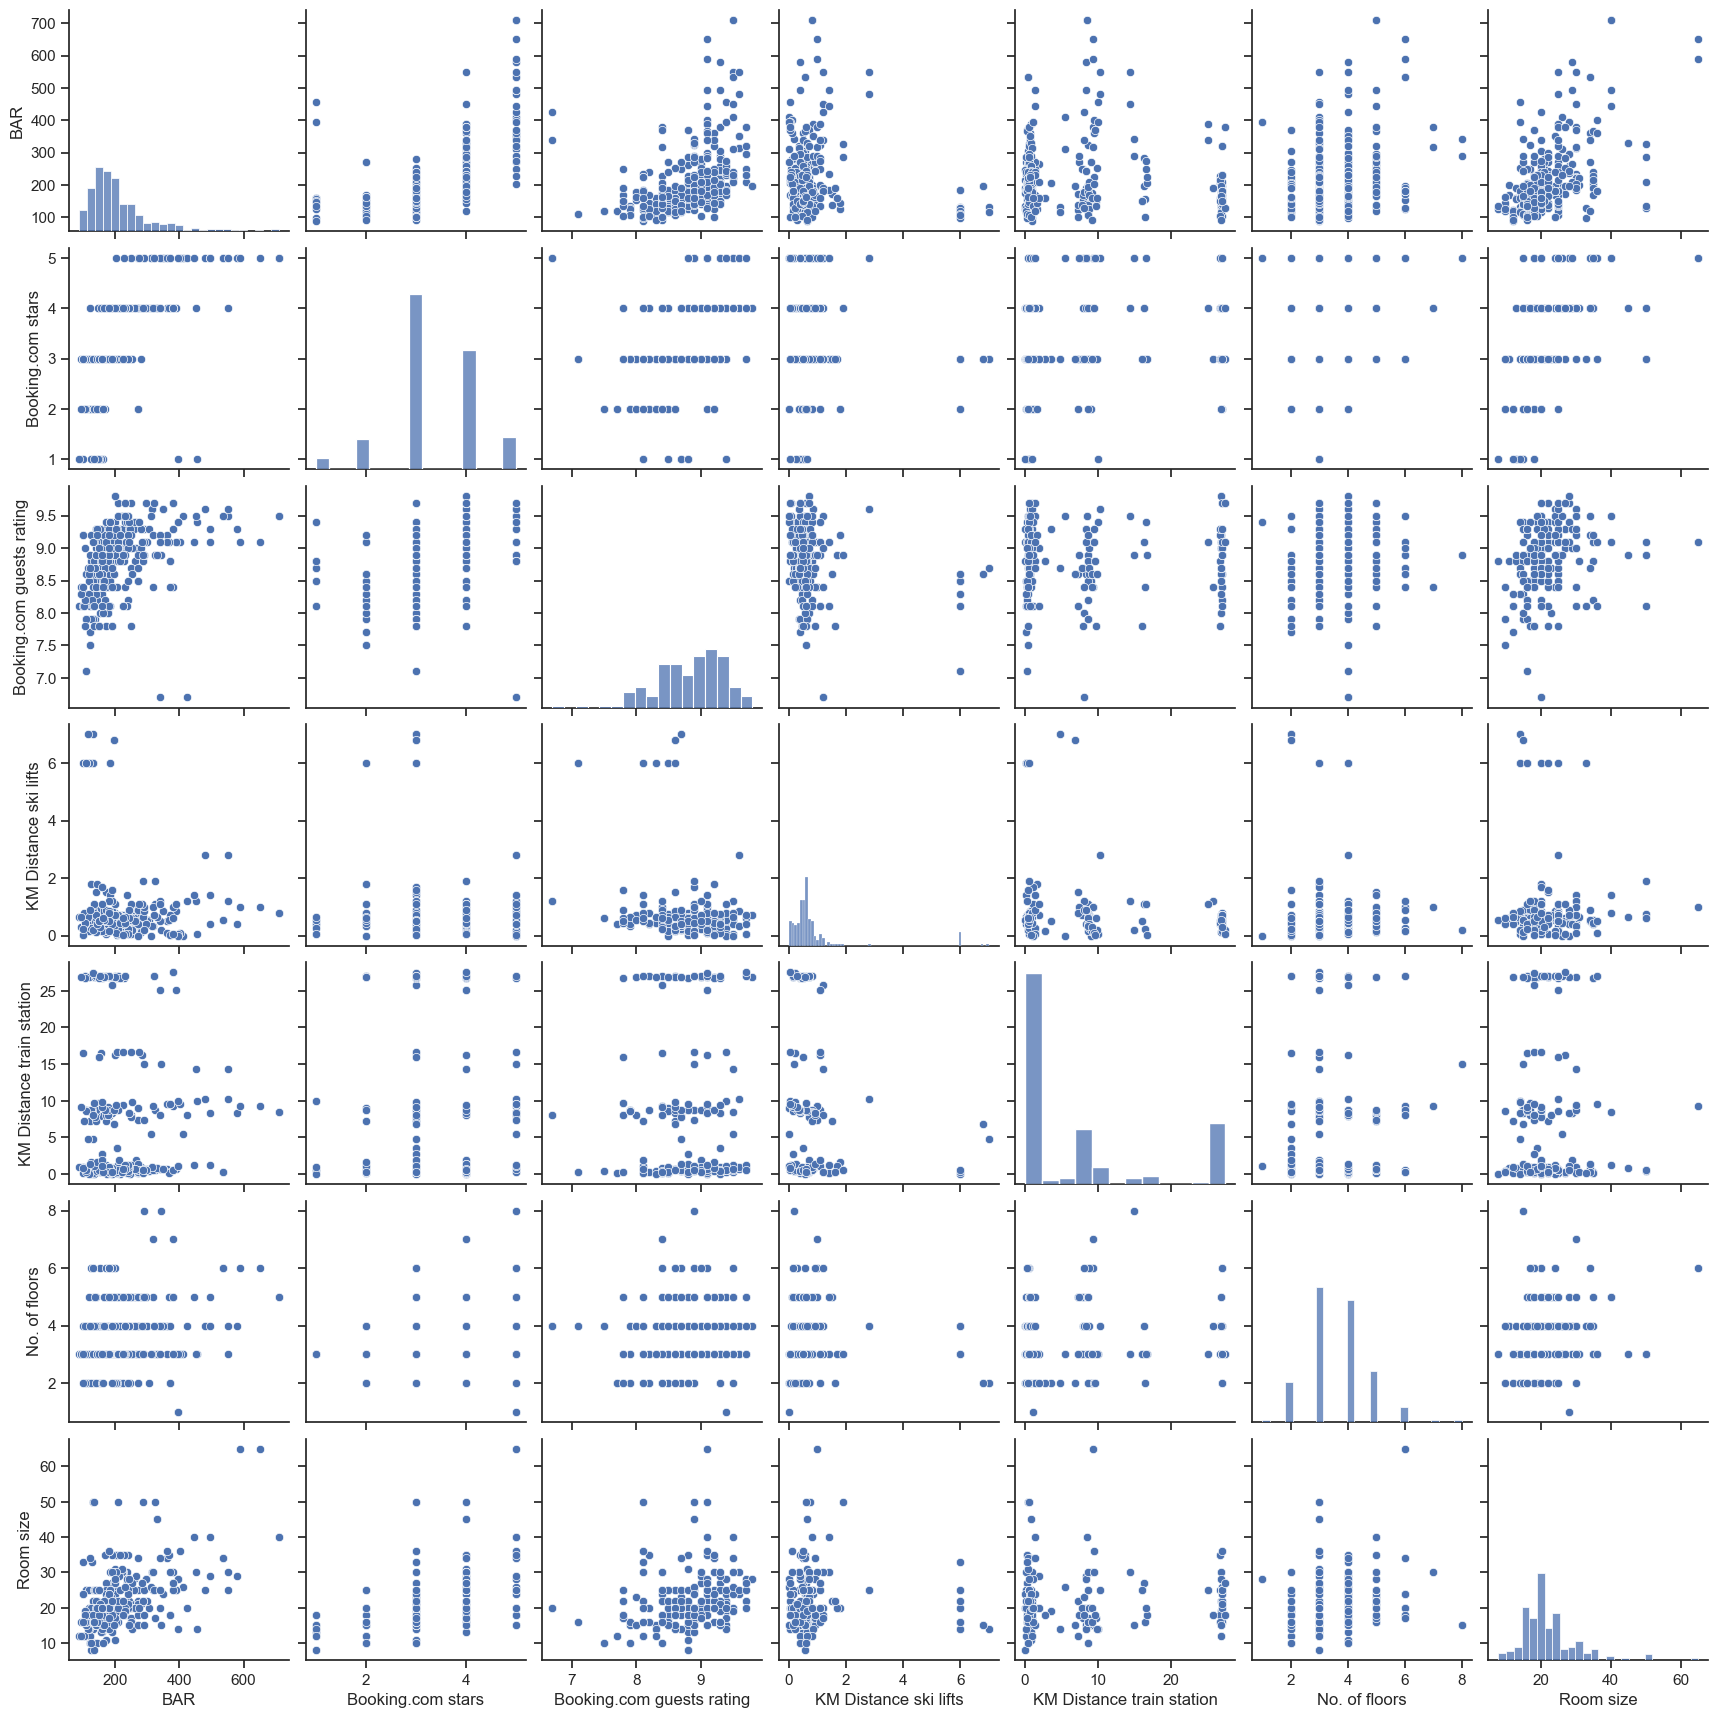

In [8]:
# Ploteamos todas las combinaciones posibles para las dos temporadas:
sns.set(style="ticks")
plt.figure(figsize=(10, 8))
sns.pairplot(df[['BAR'] + l_var_continuas])
plt.show()

- Se visualiza una relación directa entre Room Size y Booking.com guests rating. Esto puede significar multicolinialidad (Solo hipótesis)

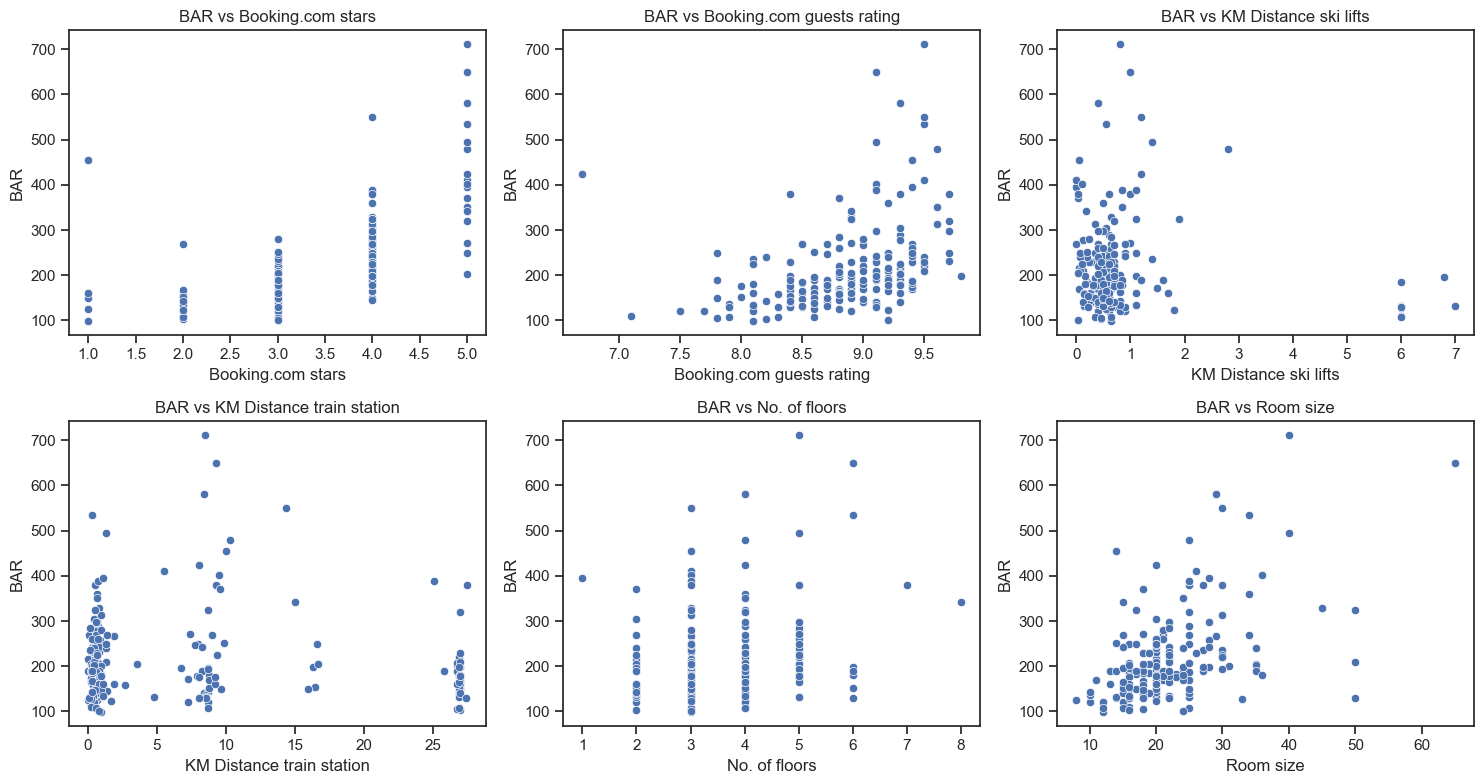

In [9]:
# Crear subplots para High season = 1
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Graficar scatterplots para cada variable continua vs la variable dependiente
for i, var in enumerate(l_var_continuas):
    row, col = divmod(i, 3)
    sns.scatterplot(x=var, y='BAR', data=df[df['High season']==1], ax=axes[row, col])
    axes[row, col].set_title(f"BAR vs {var}")
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel("BAR")

plt.tight_layout()
plt.show()

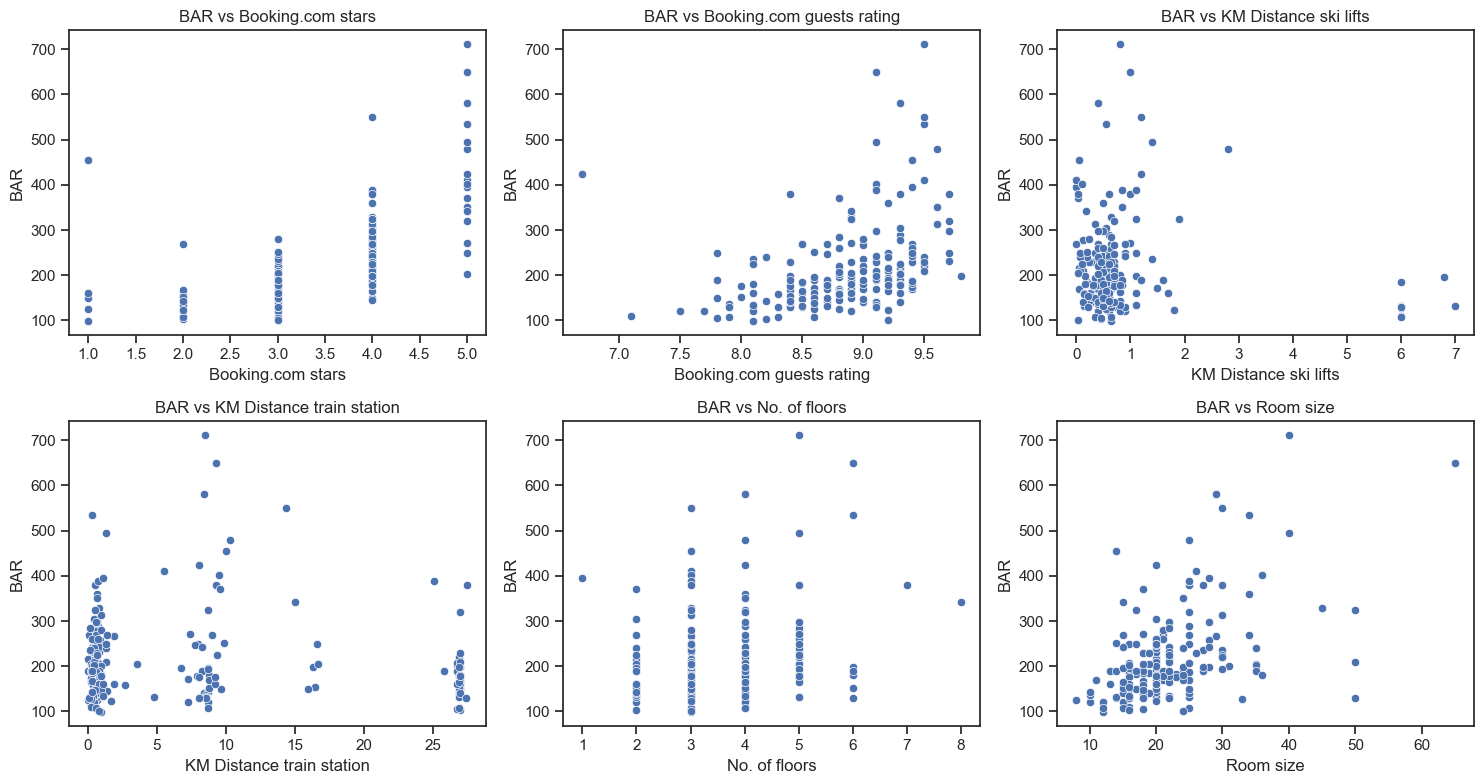

In [10]:
# Crear subplots para High season = 0
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Graficar scatterplots para cada variable continua vs la variable dependiente
for i, var in enumerate(l_var_continuas):
    row, col = divmod(i, 3)
    sns.scatterplot(x=var, y='BAR', data=df[df['High season']==1], ax=axes[row, col])
    axes[row, col].set_title(f"BAR vs {var}")
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel("BAR")

plt.tight_layout()
plt.show()

- En temporada alta y temporada baja se visualiza una relación directa entre el Precio y [Room size, Booking.com stars, Booking.com guests raiting]
- Podría existir una relación adicional Precio y KM Distance ski lifts, pero cuenta con algunos valores atípicos, se hará un zoom.

Correlación BAR - KM Distance ski lift:
-0.11653211484399496
Correlación sin outliers BAR - KM Distance ski lift:
0.16046455381151614


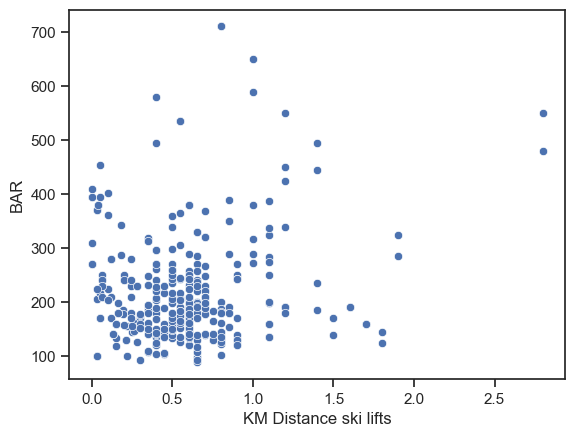

In [11]:
correlacion_bar_kmDistance = df['BAR'].corr(df['KM Distance ski lifts'])
correlacion_bar_kmDistance_sinOutliers = df[df['KM Distance ski lifts']<=3]['BAR'].corr(df[df['KM Distance ski lifts']<=3]['KM Distance ski lifts'])

print(f'Correlación BAR - KM Distance ski lift:\n{correlacion_bar_kmDistance}')
print(f'Correlación sin outliers BAR - KM Distance ski lift:\n{correlacion_bar_kmDistance_sinOutliers}')

sns.scatterplot(x='KM Distance ski lifts', y='BAR', data=df[df['KM Distance ski lifts']<=3])
plt.show()

- Se valida que no existe correlación fuerte aunque no haya outliers, sin embargo queda para el análisis de regresión.

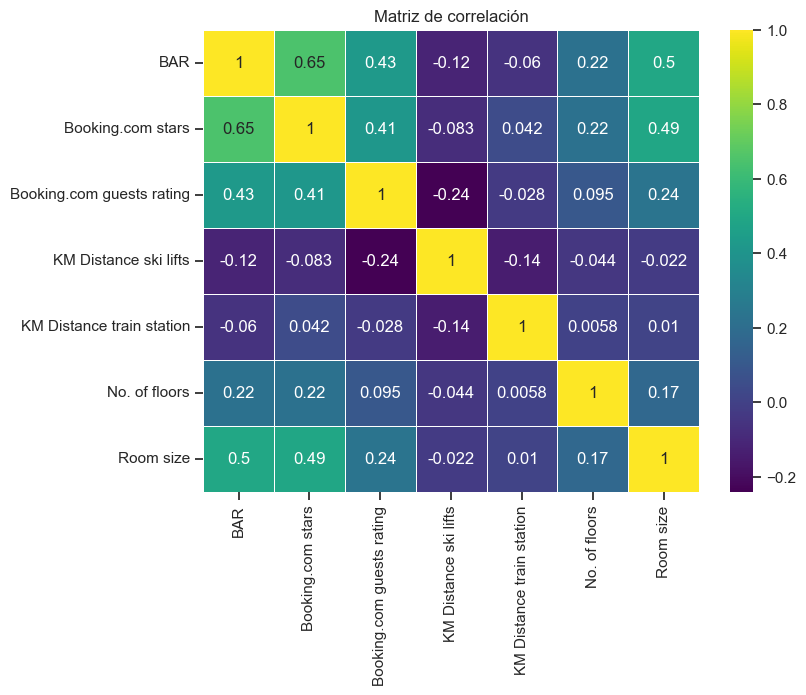

In [12]:
# Calcular la matriz de correlación
corr_matrix = df[['BAR']+l_var_continuas].corr()

# Crear un mapa de calor (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

- Se valida lo que se encontró en los gráficos anteriores, existe mayor correlación con Booking.com stars, Booking.com guests rating y Room size.
- Alta correlación entre Booking.com stars y Room size, pero no tanto como para determinar multicolinealidad.

### Tratamiento de datos

- A priori a la regresión haremos algunas modificaciones a las tablas

In [13]:
df_model = df.copy()

In [14]:
# Se creará el campo de ubicación = 'Crans-Montana' 
df_model['Aux'] = df_model['Zermatt'] + df_model['Saas Fee'] + df_model['Satellite resorts'] + df_model['Verbier']
df_model['Crans-Montana'] = np.where(df_model['Aux'] == 0, 1, 0)
df_model.drop(columns='Aux', inplace=True)

In [15]:
# Se creará el campo de Modern / Scandinavian or Traditional / Chalet 
df_model['Aux'] = df_model['Modern / Scandinavian '] + df_model['Traditional / Chalet']
df_model['Modern / Scandinavian or Traditional / Chalet'] = np.where(df_model['Aux'] == 0, 0, 1)
df_model.drop(columns='Aux', inplace=True)

### Regresión

Especificaciones actuales del Hotel:

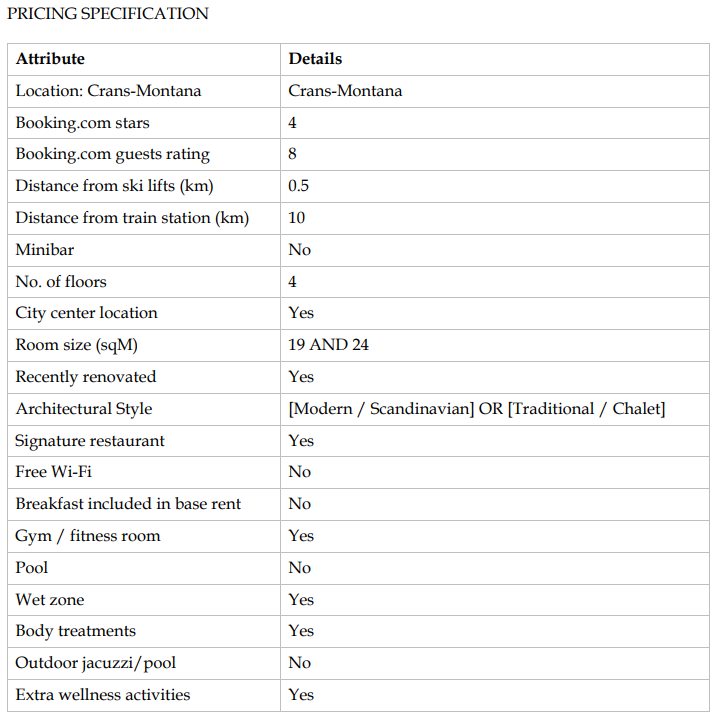

- Se busca encontrar el Precio óptimo de un cuarto de hotel con estas características.

**Modelo 1 - Regresión lineal múltiple incluyendo todas las variables de las especificaciones**

In [16]:
# Selección de variables
df_model_simul = df_model.copy()
df_model_simul = df_model_simul[[
        'LOG BAR', 'High season', 'Crans-Montana', 'Booking.com stars',
       'Booking.com guests rating', 'KM Distance ski lifts',
       'KM Distance train station', 'Minibar', 'No. of floors',
       'City center location', 'Room size', 'Recently renovated',
       'Modern / Scandinavian or Traditional / Chalet',
       'Signature restaurant', 'Free Wi-Fi', 'Breakfast included in base rent',
       'Gym / fitness room', 'Pool', 'Wet zone', 'Body treatments',
       'Outdoor jacuzzi/ pool', 'Extra wellness activities' 
]]

In [17]:
X = df_model_simul.drop(columns='LOG BAR')
X = sm.add_constant(X)  # Agrega el término constante
y = df_model_simul['LOG BAR']

# Modelo
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                LOG BAR   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     32.46
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           1.61e-70
Time:                        01:29:17   Log-Likelihood:                 345.10
No. Observations:                 388   AIC:                            -646.2
Df Residuals:                     366   BIC:                            -559.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

- Este primer modelo muestra variables con un p-valor > 0.05 e incluso mayor a 0.01, por lo cual no se tomará en cuenta este modelo por más que esté tomando todas las variables de las especificaciones. Haremos otro modelo con menos variables, pero donde el precio esté con menor posible error y no pueda estar alterado por variables que no contribuyen al modelo.

**Modelo 2 - Regresión lineal múltiple incluyendo solo variables significativas**

In [18]:
# Selección de campos
df_model_mejorado = df_model.copy()
df_model_mejorado = df_model_mejorado[[
        'LOG BAR',
        'High season',
        'Crans-Montana',
        'Booking.com stars',
        'Booking.com guests rating',
        'KM Distance ski lifts',
        'KM Distance train station',
        'Minibar',
#        'No. of floors',
#        'City center location',
        'Room size',
#        'Recently renovated',
        'Traditional / Chalet',
        'Signature restaurant',
#        'Free Wi-Fi',
        'Breakfast included in base rent',
#        'Gym / fitness room',
#        'Pool',
#        'Wet zone',
        'Body treatments',
#        'Outdoor jacuzzi/ pool',
        'Extra wellness activities',
#        'Modern / Scandinavian ',
#        'Modern / Scandinavian or Traditional / Chalet'  
]]

In [19]:
# Ajusta un modelo de regresión lineal robusta utilizando MCO
X = df_model_mejorado.drop(columns='LOG BAR')
X = sm.add_constant(X)  # Agrega el término constante
y = df_model_mejorado['LOG BAR']

# Modelo
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                LOG BAR   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     52.03
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           1.46e-75
Time:                        01:29:17   Log-Likelihood:                 341.41
No. Observations:                 388   AIC:                            -654.8
Df Residuals:                     374   BIC:                            -599.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

- Variable Dependiente: La variable dependiente en el modelo es “LOG BAR”, que representa el logaritmo del precio. Al usar el logaritmo, estamos transformando la variable para que la relación entre las características y el precio sea más lineal.

- Coeficientes: Los coeficientes son las estimaciones de cómo las características (variables independientes) afectan la variable dependiente. Por ejemplo:
    Booking.com stars: Un aumento de 1 unidad en la variable se asocia con un aumento del 6.79% en el precio.
    Minibar: Cuando la variable es 1 hay con un aumento del 2.44% en el precio.
Esto se debe a que estamos en una escala logarítmica, por lo que el coeficiente se interpreta como un porcentaje de cambio.

- Significancia: La columna “P>|t|” muestra los valores p. Un valor p pequeño (generalmente < 0.05) indica que la característica es estadísticamente significativa. Por ejemplo, “Booking.com stars” y “Booking.com guests rating” son significativos (p < 0.05). Pero en no siempre se toma este caso, a veces también se debe tomar la interpretación.

- R-cuadrado (R-squared): El R-cuadrado mide la proporción de la variabilidad en el logaritmo del precio que se explica por las características incluidas en el modelo. En este caso, el 64.4% de la variabilidad se explica por las características.

- Durbin-Watson: Este estadístico mide la autocorrelación en los residuos. Un valor cercano a 2 sugiere que no hay autocorrelación. eE valor del estadístico de Durbin-Watson está dentro de un rango aceptable, lo que sugiere que los residuos no están correlacionados.

**Modelo Seleccionado**
- El modelo 2 es el seleccionado, porque cuenta solo con las variables de mayor importancia y con el cual se podrá tomar decisiones basados en su predicción del Precio.

### RESULTADOS

In [20]:
# Creamos un DataFrame para almacenar los coeficientes
df_coefficients = pd.DataFrame({'Coefficient': results.params}).reset_index().rename(columns={'index':'Variable'})
df_coefficients


,Variable,Coefficient
0,const,1.353277
1,High season,0.023117
2,Crans-Montana,0.024754
3,Booking.com stars,0.067874
4,Booking.com guests rating,0.062209
5,KM Distance ski lifts,-0.016236
6,KM Distance train station,-0.002053
7,Minibar,0.024359
8,Room size,0.003884
9,Traditional / Chalet,0.023827


In [27]:
# Función para simular el precio
def precioModel(dict_specifications):
    df_specifications = pd.DataFrame.from_dict(dict_specifications, orient='index', columns=['Specification'])
    df_specifications.index.name = 'Variable'
    df_simulation = df_coefficients.merge(df_specifications, how='left', on='Variable')
    df_simulation['Coef_x_Specif'] = df_simulation['Coefficient'] * df_simulation['Specification']
    simulated_price =  10 ** (df_simulation['Coef_x_Specif'].sum())
    return simulated_price

In [32]:
# Se toman especificaciones en función a las solicitadas inicialmente, solo cambiando alta_temporada y el Room size
dict_specifications_1 = {
    'const': 1,'High season': 0, 'Crans-Montana': 1, 'Booking.com stars': 4, 'Booking.com guests rating': 8,
    'KM Distance ski lifts': 0.5, 'KM Distance train station': 10, 'Minibar': 0, 'Room size': 19, 'Traditional / Chalet': 1,
    'Signature restaurant': 1, 'Breakfast included in base rent':0, 'Body treatments': 1, 'Extra wellness activities': 1
}

dict_specifications_2 = {
    'const': 1,'High season': 0, 'Crans-Montana': 1, 'Booking.com stars': 4, 'Booking.com guests rating': 8,
    'KM Distance ski lifts': 0.5, 'KM Distance train station': 10, 'Minibar': 0, 'Room size': 24, 'Traditional / Chalet': 1,
    'Signature restaurant': 1, 'Breakfast included in base rent':0, 'Body treatments': 1, 'Extra wellness activities': 1
}

dict_specifications_3 = {
    'const': 1,'High season': 1, 'Crans-Montana': 1, 'Booking.com stars': 4, 'Booking.com guests rating': 8,
    'KM Distance ski lifts': 0.5, 'KM Distance train station': 10, 'Minibar': 0, 'Room size': 19, 'Traditional / Chalet': 1,
    'Signature restaurant': 1, 'Breakfast included in base rent':0, 'Body treatments': 1, 'Extra wellness activities': 1
}

dict_specifications_4 = {
    'const': 1,'High season': 1, 'Crans-Montana': 1, 'Booking.com stars': 4, 'Booking.com guests rating': 8,
    'KM Distance ski lifts': 0.5, 'KM Distance train station': 10, 'Minibar': 0, 'Room size': 24, 'Traditional / Chalet': 1,
    'Signature restaurant': 1, 'Breakfast included in base rent':0, 'Body treatments': 1, 'Extra wellness activities': 1
}

# -------------------------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------------------


# Se toman especificaciones en función a las solicitadas inicialmente, pero agreagando el Minibar y cambiando alta_temporada y el Room size
dict_specifications_5 = {
    'const': 1,'High season': 0, 'Crans-Montana': 1, 'Booking.com stars': 4, 'Booking.com guests rating': 8,
    'KM Distance ski lifts': 0.5, 'KM Distance train station': 10, 'Minibar': 1, 'Room size': 19, 'Traditional / Chalet': 1,
    'Signature restaurant': 1, 'Breakfast included in base rent':0, 'Body treatments': 1, 'Extra wellness activities': 1
}

dict_specifications_6 = {
    'const': 1,'High season': 0, 'Crans-Montana': 1, 'Booking.com stars': 4, 'Booking.com guests rating': 8,
    'KM Distance ski lifts': 0.5, 'KM Distance train station': 10, 'Minibar': 1, 'Room size': 24, 'Traditional / Chalet': 1,
    'Signature restaurant': 1, 'Breakfast included in base rent':0, 'Body treatments': 1, 'Extra wellness activities': 1
}

dict_specifications_7 = {
    'const': 1,'High season': 1, 'Crans-Montana': 1, 'Booking.com stars': 4, 'Booking.com guests rating': 8,
    'KM Distance ski lifts': 0.5, 'KM Distance train station': 10, 'Minibar': 1, 'Room size': 19, 'Traditional / Chalet': 1,
    'Signature restaurant': 1, 'Breakfast included in base rent':0, 'Body treatments': 1, 'Extra wellness activities': 1
}

dict_specifications_8 = {
    'const': 1,'High season': 1, 'Crans-Montana': 1, 'Booking.com stars': 4, 'Booking.com guests rating': 8,
    'KM Distance ski lifts': 0.5, 'KM Distance train station': 10, 'Minibar': 1, 'Room size': 24, 'Traditional / Chalet': 1,
    'Signature restaurant': 1, 'Breakfast included in base rent':0, 'Body treatments': 1, 'Extra wellness activities': 1
}


# -------------------------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------------------


# Se toman especificaciones en función a las solicitadas inicialmente, pero agreagando Breakfast included in base rent y cambiando alta_temporada y el Room size
dict_specifications_9 = {
    'const': 1,'High season': 0, 'Crans-Montana': 1, 'Booking.com stars': 4, 'Booking.com guests rating': 8,
    'KM Distance ski lifts': 0.5, 'KM Distance train station': 10, 'Minibar': 0, 'Room size': 19, 'Traditional / Chalet': 1,
    'Signature restaurant': 1, 'Breakfast included in base rent':1, 'Body treatments': 1, 'Extra wellness activities': 1
}

dict_specifications_10 = {
    'const': 1,'High season': 0, 'Crans-Montana': 1, 'Booking.com stars': 4, 'Booking.com guests rating': 8,
    'KM Distance ski lifts': 0.5, 'KM Distance train station': 10, 'Minibar': 0, 'Room size': 24, 'Traditional / Chalet': 1,
    'Signature restaurant': 1, 'Breakfast included in base rent':1, 'Body treatments': 1, 'Extra wellness activities': 1
}

dict_specifications_11 = {
    'const': 1,'High season': 1, 'Crans-Montana': 1, 'Booking.com stars': 4, 'Booking.com guests rating': 8,
    'KM Distance ski lifts': 0.5, 'KM Distance train station': 10, 'Minibar': 0, 'Room size': 19, 'Traditional / Chalet': 1,
    'Signature restaurant': 1, 'Breakfast included in base rent':1, 'Body treatments': 1, 'Extra wellness activities': 1
}

dict_specifications_12 = {
    'const': 1,'High season': 1, 'Crans-Montana': 1, 'Booking.com stars': 4, 'Booking.com guests rating': 8,
    'KM Distance ski lifts': 0.5, 'KM Distance train station': 10, 'Minibar': 0, 'Room size': 24, 'Traditional / Chalet': 1,
    'Signature restaurant': 1, 'Breakfast included in base rent':1, 'Body treatments': 1, 'Extra wellness activities': 1
}

# -------------------------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------------------


# Se toman especificaciones en función a las solicitadas inicialmente, pero agreagando el MiniBar y  Breakfast included in base rent y cambiando alta_temporada y el Room size
dict_specifications_13 = {
    'const': 1,'High season': 0, 'Crans-Montana': 1, 'Booking.com stars': 4, 'Booking.com guests rating': 8,
    'KM Distance ski lifts': 0.5, 'KM Distance train station': 10, 'Minibar': 1, 'Room size': 19, 'Traditional / Chalet': 1,
    'Signature restaurant': 1, 'Breakfast included in base rent': 1, 'Body treatments': 1, 'Extra wellness activities': 1
}

dict_specifications_14 = {
    'const': 1,'High season': 0, 'Crans-Montana': 1, 'Booking.com stars': 4, 'Booking.com guests rating': 8,
    'KM Distance ski lifts': 0.5, 'KM Distance train station': 10, 'Minibar': 1, 'Room size': 24, 'Traditional / Chalet': 1,
    'Signature restaurant': 1, 'Breakfast included in base rent': 1, 'Body treatments': 1, 'Extra wellness activities': 1
}

dict_specifications_15 = {
    'const': 1,'High season': 1, 'Crans-Montana': 1, 'Booking.com stars': 4, 'Booking.com guests rating': 8,
    'KM Distance ski lifts': 0.5, 'KM Distance train station': 10, 'Minibar': 1, 'Room size': 19, 'Traditional / Chalet': 1,
    'Signature restaurant': 1, 'Breakfast included in base rent': 1, 'Body treatments': 1, 'Extra wellness activities': 1
}

dict_specifications_16 = {
    'const': 1,'High season': 1, 'Crans-Montana': 1, 'Booking.com stars': 4, 'Booking.com guests rating': 8,
    'KM Distance ski lifts': 0.5, 'KM Distance train station': 10, 'Minibar': 1, 'Room size': 24, 'Traditional / Chalet': 1,
    'Signature restaurant': 1, 'Breakfast included in base rent': 1, 'Body treatments': 1, 'Extra wellness activities': 1
}


In [60]:
l_h_season = []
l_room_size = []
l_simulation = []
l_simulated_price = []

for i in range(1, 17):
    dict_name = 'dict_specifications_' + str(i)
    dict_specif = eval(dict_name)
    specif_season = dict_specif['High season']
    specif_room = dict_specif['Room size']
    specif_minibar = dict_specif['Minibar']
    specif_breakfast = dict_specif['Breakfast included in base rent']
    simulated_price = precioModel(dict_specif)

    simulation = 'Especif. Iniciales'

    if specif_minibar == 1:
        simulation = simulation + ' + Minibar'

    if specif_breakfast == 1:
        simulation = simulation + ' + Breakfast'

    l_h_season.append(specif_season)
    l_room_size.append('Room Size: ' + str(specif_room))
    l_simulation.append(simulation)
    l_simulated_price.append(simulated_price)


In [69]:
df_results = pd.DataFrame({
    'High_season': l_h_season,
    'Room_size': l_room_size,
    'Simulation': l_simulation,
    'Simulated_Price': l_simulated_price
})

df_results = df_results.sort_values(['High_season', 'Room_size'])

In [98]:
def resultsScatter(df, high_season=0):
    print('   *******************************************************************************')
    print('   ********************* PRECIOS SIMULADOS - HIGH SEASON = ' + str(high_season) + ' *********************')
    print('   *******************************************************************************\n')

    print(df[(df['High_season'] == high_season) & (df_results['Room_size'] == 'Room Size: 19')][['Room_size', 'Simulation', 'Simulated_Price']],'\n')
    print(df[(df['High_season'] == high_season) & (df_results['Room_size'] == 'Room Size: 24')][['Room_size', 'Simulation', 'Simulated_Price']])


    plt.figure(figsize=(12, 5))
    sns.scatterplot(data=df[df['High_season'] == high_season], x='Simulation', y='Simulated_Price', hue='Room_size', palette='Set1', s=200)
    plt.axvline(x='Especif. Iniciales', color='grey', linestyle='--', linewidth=1)
    plt.axvline(x='Especif. Iniciales + Minibar', color='grey', linestyle='--', linewidth=1)
    plt.axvline(x='Especif. Iniciales + Breakfast', color='grey', linestyle='--', linewidth=1)
    plt.axvline(x='Especif. Iniciales + Minibar + Breakfast', color='grey', linestyle='--', linewidth=1)
    plt.legend(loc='upper left')
    plt.title('PRECIOS SIMULADOS - HIGH SEASON = ' + str(high_season))
    plt.show()

   *******************************************************************************
   ********************* PRECIOS SIMULADOS - HIGH SEASON = 0 *********************
   *******************************************************************************

        Room_size                                Simulation  Simulated_Price
0   Room Size: 19                        Especif. Iniciales       224.240809
4   Room Size: 19              Especif. Iniciales + Minibar       237.177804
8   Room Size: 19            Especif. Iniciales + Breakfast       242.544144
12  Room Size: 19  Especif. Iniciales + Minibar + Breakfast       256.537104 

        Room_size                                Simulation  Simulated_Price
1   Room Size: 24                        Especif. Iniciales       234.496864
5   Room Size: 24              Especif. Iniciales + Minibar       248.025556
9   Room Size: 24            Especif. Iniciales + Breakfast       253.637335
13  Room Size: 24  Especif. Iniciales + Minibar + Break

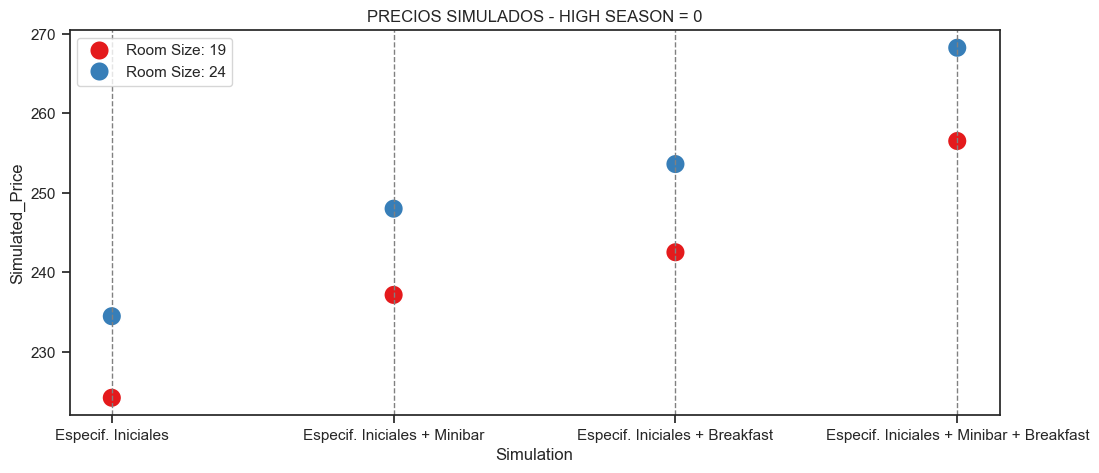

In [99]:
# PRECIOS SIMULADOS - HIGH SEASON = 0
resultsScatter(df_results, 0)

   *******************************************************************************
   ********************* PRECIOS SIMULADOS - HIGH SEASON = 1 *********************
   *******************************************************************************

        Room_size                                Simulation  Simulated_Price
2   Room Size: 19                        Especif. Iniciales       236.500487
6   Room Size: 19              Especif. Iniciales + Minibar       250.144773
10  Room Size: 19            Especif. Iniciales + Breakfast       255.804501
14  Room Size: 19  Especif. Iniciales + Minibar + Breakfast       270.562482 

        Room_size                                Simulation  Simulated_Price
3   Room Size: 24                        Especif. Iniciales       247.317260
7   Room Size: 24              Especif. Iniciales + Minibar       261.585592
11  Room Size: 24            Especif. Iniciales + Breakfast       267.504178
15  Room Size: 24  Especif. Iniciales + Minibar + Break

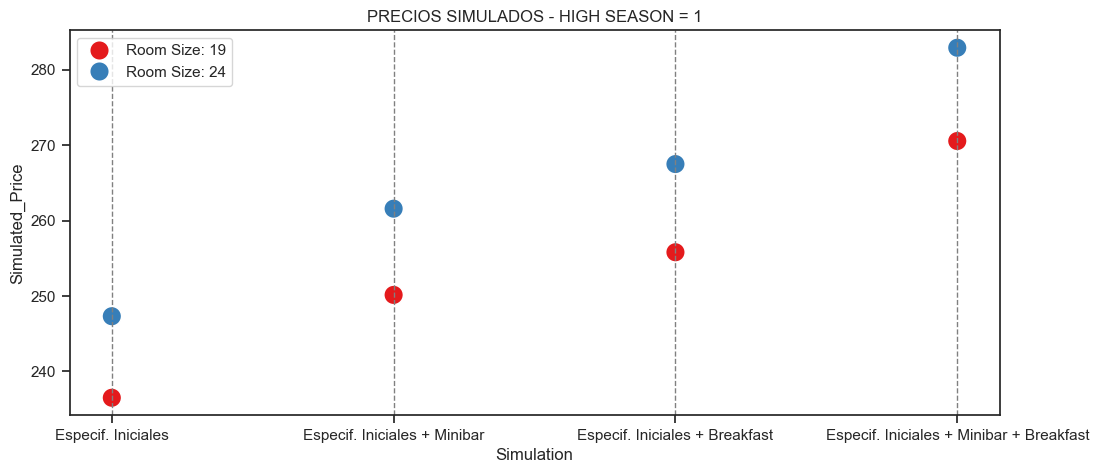

In [100]:
# PRECIOS SIMULADOS - HIGH SEASON = 1
resultsScatter(df_results, 1)

- Observamos que tanto en temporada alta como en temporada baja tomar en cuenta las dos variables adicionales Minibar y Breakfast aportará directamente en el precio tanto para room size 19 y 24. 

### CONCLUSIONES Y RECOMENDACIONES

- El modelo escogido cuenta con un R2 = 64.4%, el cual para este tipo de problema es aceptable, adicionalmente las variables cuenta con valores estadísticos aceptables y también valores lógicos claros.
- En la recomendaciones iniciales no se toma en cuenta las variables Minibar y Breakfast, pero incluirlas lograría que el precio aumente lo necesario para llegar al objetivo.
- La recomendación directamente es tomar en cuenta las dos variables antes mencionadas para aumentar los precios.
- En el caso se plantee crear un nuevo hotel, tener en cuenta la cercanía en KM con ski lifts y train station, puesto que el precio está relacionado de manera inversa con la distancia en KM a estos lugares.